In [ ]:
# Es muy raro escribir un domingo a una de las companieras que le comente un domingo, y a que hora seria menos raro, pues en plan chill?

# Previo toca importar paquetes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
import uncertainties as un


def plot_template(title, x_label, y_label, x_lim=None, y_lim=None):
    """Genera la plantilla para mantener consistencia en el formato
    de cada tabla generada.

    Args:
        title (string): Aplica titulos.
        x_label (float): Título de eje x.
        y_label (float): Título de eje y.
        x_lim ([float], optional): Límite en eje x. Defaults to None.
        y_lim ([float], optional): Límite en eje y. Defaults to None.

    Returns:
        object: Devuelve los objetos de la gráfica modificados con la
        plantilla requerida
    """
    fig, ax = plt.subplots(  # Tamaño de la figura en pulgadas (ancho, alto)
        figsize=(10, 6)
    )

    # Configuración de rótulos y unidades
    ax.set_title(title, fontsize=18)  # Título con tamaño de fuente
    ax.set_xlabel(x_label, fontsize=16)  # Eje x con rótulo y unidades
    ax.set_ylabel(y_label, fontsize=16)  # Eje y con rótulo y unidades

    # Configuración de la escala y las dimensiones
    if x_lim is not None:
        ax.set_xlim(x_lim)  # Limitar el eje x
    if y_lim is not None:
        ax.set_ylim(y_lim)  # Limitar el eje y

    ax.grid(True, which="both", linestyle="--", alpha=0.7)  # Añadir una cuadrícula

    fig.tight_layout()  # Ajusta los elementos para que no se solapen

    return (  # Devolver las figuras y ejes para más modificaciones si es necesario
        fig,
        ax,
    )


# test
if False:
    x = np.linspace(0, 10, 100)
    fig, ax = plot_template("This is a test", "X label", "Y label", [0, 10], [-1, 1])
    ax.scatter(x, [np.sin(i) for i in x], marker="+", color="red")

# Práctica #2: Formación de Imagenes

_Andrés Felipe Pinzón y Cristian Camilo Pérez_

Universidad Nacional de Colombia

Departamento de Física y Matemáticas


## Tabla de Contenidos

- [Introducción](#introduccion)
- [Modelación Teórica](#modelacion_teorica)
- [Metodología](#metodologia)
- [Análisis y Resultados](#analisis_y_resultados)
- [Conclusiones](#conclusiones)
- [Referencias](#referencias)


## Introducción


En esta práctica experimental, se estuhiará la formación de imagenes desde la teoría de la óptica geométrica, se resolverá el sistema simple del lente convergente (positivo) estudiando los parámetros que definen el fenómeno a través del las ecuaciones que definen su comportamiento con la _ley de Gauss con la aproximación paraxial_.

Además, se verá la relación de la proporción $m$ para con la posición del lente y la relación con el foco a través de la ley de Newton, y por último, estudiaremos el comportamiento con la aproximación de la lente en un punto infinito.


## Modelación Teorica


Se estudia la formación de imagen producida por un lente convergente (positiva) con un objeto de origen $o$ a una distancia de la lente $s_o$ y $s_i$ la distancia donde la imagen se forma, también conocido como punto conjugado de $s_o$. El estudio de las propiedades de las _lentes con aproximación delgada_ es la simplificación de la ecuación de Gauss reducida a

$$\frac{1}{f} = \frac{1}{s_i} - \frac{1}{s_0}$$

Donde $f$ es el foco como parámetro característico de la lente en esta aproximación dada por la ecuación del fabricante de lentes
$$\frac{1}{f} = \frac{(n_l - n)}{n} \left( \frac{1}{R_1} - \frac{1}{R_2} \right)$$
Con $n$ siendo el aire.

También se utilizará la distancia relativa a los diferentes focos respecto la posición del objeto y la imagen para determinar la relación de la _ley de Newton_ que establece
$$x_o x_i = - f^2$$
Donde $x_o$ es la distancia del foco primario al objeto y $x_i$ la distancia del foco secundario a la imagen.

Además, se noratará que la proporción de la imagen respecto al objeto $m$ se define como
$$m = \frac{h_i}{h_o} = \frac{s_i}{s_o}$$

Utilizando la ecuación de _Newton_ se deduce
$$m = \frac{f}{x_o} \qquad m = -\frac{x_i}{f}$$

Toda la información de convención de terminos pueda ser consultada en el libro de Fundamentos de Óptica (vease [Referencias](##Referencias))


## Metodología


### Esquema experimental


Haremos uso de los siguientes dispositivos para la práctica a continuación.

1. Riel con escala métrica. $\checkmark$
2. Lente positiva. $\checkmark$
3. Objeto translúcido. $\checkmark$
4. Pantalla para observar la imagen. $\checkmark$
5. Cámara fotográfica (celular). $\checkmark$
6. Fuente luminosa (linterna). $\checkmark$
7. Cinta pegante y tijeras. $\checkmark$

Se colocará una fuente de luz que iluminará nuestro objeto difusor de la luz (papel mantequilla), de aquí filtraremos la luz para reflejar una imagen de rejilla de 8x5 puntos circulares. La imagen formada a través de la lente se reflejará sobre un papel milimetrado en la que podremos ajustar la nitidez y la proporción


![Esquema](esquema.png)


### Procedimiento Experimental


Como mediciones previas, se anoto el tamaño de los orificios verticales más distantes de la malla que funcionará como imagen en $h_o = 1.70(5) \, \text{cm}$. Posterior, hicimos un ejercicio para ajustar el rango de las mediciones, se abarcará entonces distancia mínima del objeto al lente de $s_{om} = 20.0(1) \, \text{cm}$ hasta la máxima de $s_{oM} = 50.0(1) \, \text{cm}$, donde se obtienen imagenes nitidas.

Comenzando la práctica, realizamos la medida de la distancia del objeto ($s_o$) e imagen ($s_i$) para 10 posiciones diferentes del objeto. En cada caso, se tomaron 2 mediciones de manera alternada para un total de 4 y lograr determinamos la incertidumbre a partir de estas mediciones conjuntas. En este mismo ejercicio, anotaremos la altura de los orificios más distantes de la imagen formada con $h_i$ y determinaremos el factor de proporción $m$.

Luego, escogeremos una distancia fija entre el objeto y la pantalla de la imagen, variando la posición de la lente encontraremos los 2 puntos de enfoque (imagen nítida) resultantes de aumentos recíprocos entre sí, es decir, $m$ y $1/m$.

Finalmente, se realizó la medida de la distancia de la imagen cuando el objeto se coloca a una gran distancia de la lente.


## Análisis y Resultados


Se tratan los datos para tener unas tablas que brinden información relevante del fenómeno


### Tratamiento de datos


Se describen las variables que se van a tratar. Todos los datos que contengan una incertidumbre, usualmente se notarán con un `u_` en el principio.

Medidas directas:

- `ho`: Altura del objeto inicial $h_o = 17(1) \, \text{mm}$
- `O` : Posición de la lente respecto escala $O = 700(1) \, \text{mm}$
- `do` : Posición del objeto respecto escala $d_o$ ($\pm 1\, \text{mm}$).
- `di` : Posición de la imagen respecto escala $d_i$ ($\pm 1\, \text{mm}$).

Medidas indirectas:

- `so` : Posición del objeto respecto la lente $s_o$ ($\pm 2\, \text{mm}$).
- `si` : Posición de la imagen respecto la lente $s_i$ ($\pm 2\, \text{mm}$).
- `f` : Posición del foco primario respecto a la lente $f$. Se describe a través de la regresión lineal $y = ax + b$
- `intercept` : Intercepto con $y$ de la linealización, es decir, $b$ en la anterior ecuación.
- `slope` : Pendiente de la linealización, es decir, $a$ en la anterior ecuación.
- `f_m` : Foco resuelto asuminendo pendiente $a = 1$ como comparación.

La propagación del error viene dada por la incertidumbre sistemática que se calcula como

$$
\sigma(g) = \left| \frac{\partial f}{\partial x} \right| \sigma(x) + \left| \frac{\partial f}{\partial z} \right| \sigma(z)
$$

Y la propagacion estadística como es usual
$$\sigma^2(f) = \left( \frac{\partial f}{\partial x} \right)^2 \sigma^2(x) + \left( \frac{\partial f}{\partial z} \right)^2 \sigma^2(z)$$


#### Datos


Se guardan los datos para el procesamiento.


In [ ]:
# Datos
nominal_s = 2  # mm
nominal_h = 1  # mm

ho = 17  # \pm 0.5mm
O = 700  # \pm 1mm
do = np.array([500, 470, 440, 410, 380, 350, 320, 290, 260, 230, 480])  # 1mm
di = np.array(
    [
        [1190, 1190, 1185, 1196],
        [1090, 1086, 1088, 1083],
        [1035, 1025, 1031, 1037],
        [996, 1003, 998, 1005],
        [976, 972, 973, 970],
        [959, 955, 954, 952],
        [944, 940, 939, 944],
        [931, 937, 930, 929],
        [925, 920, 923, 925],
        [914, 912, 915, 915],
        [1119, 1117, 1113, 1114],
    ]
)
hi = np.array(
    [
        [39, 39, 39.5, 39],
        [26.50, 26.50, 27.0, 27.5],
        [21.0, 21.0, 21.0, 21.0],
        [16.0, 17.0, 16.0, 17.0],
        [14.0, 14.0, 14.0, 14.0],
        [11.0, 12.0, 12.0, 12.0],
        [10, 10, 10, 11],
        [9, 9, 9, 9],
        [8, 8, 8, 8],
        [7.5, 8, 8, 0.8],
        [29.0, 30.0, 31.0, 30.0],
    ]
)

# Parámetros
mediciones, repeticiones = di.shape
so = O - do
si = di - O

# Comprobaciones
if False:
    rows_di, cols_di = di.shape
    rows_hi, cols_hi = hi.shape
    print(rows_di, cols_di)
    print(rows_hi, cols_hi)
    print(len(si))
so

array([200, 230, 260, 290, 320, 350, 380, 410, 440, 470, 220])

Se deriva la tabla resultante, compuesta de los promedios de las mediciones (usual) y la dispersión alrededor de la media calculada como:

$$
\sigma(\hat{\mu}) = \sigma(\bar{x}) = \frac{\hat{\sigma}}{\sqrt{n}}
$$


In [3]:
# Calcular promedios de si y hi
si_mean = np.array([np.mean(row) for row in si])
si_uncertain = np.array([np.std(row) / np.sqrt(repeticiones) for row in si])
hi_mean = np.array([np.mean(row) for row in hi])
hi_uncertain = np.array([np.std(row) / np.sqrt(repeticiones) for row in hi])

# Incertidumbre real (respecto la estadística y la nominal)
si_uncertain = np.sqrt(si_uncertain**2 + nominal_s**2)
hi_uncertain = np.sqrt(hi_uncertain**2 + nominal_h**2)


# Comprobaciones
if False:
    print(len(hi_mean), len(hi_uncertain))
    print(
        *[f"{si_mean[i]:.0f} - {si_uncertain[i]:1.0f}" for i in range(len(si_mean))],
        sep="\n",
    )

Se verifica la tabla resultante:


In [92]:
# Crear el DataFrame y visualizar datos
df = pd.DataFrame(
    {
        "so (mm)": so,
        "Promedio si (mm)": si_mean,
        "Incertidumbre si (mm)": si_uncertain,
        "Promedio hi (mm)": hi_mean,
        "Incertidumbre hi (mm)": hi_uncertain,
    }
)
df = df.sort_values(by="so (mm)")
# comprobar
if True:
    print(df)

    so (mm)  Promedio si (mm)  Incertidumbre si (mm)  Promedio hi (mm)  \
0       200            490.25               2.792288            39.125   
10      220            415.75               2.328492            30.000   
1       230            386.75               2.381570            26.875   
2       260            332.00               3.041381            21.000   
3       290            300.50               2.704163            16.500   
4       320            272.75               2.274176            14.000   
5       350            255.00               2.371708            11.750   
6       380            241.75               2.301494            10.250   
7       410            231.75               2.534142             9.000   
8       440            223.25               2.246525             8.000   
9       470            214.00               2.091650             6.075   

    Incertidumbre hi (mm)  
0                1.005842  
10               1.060660  
1                1.021258  

#### Visualización de Datos (so vs si)


Se genera una relación de dispersión respecto los datos tomados conociendo que $s_o < 0$, se generaron 2 aproximaciones de ajuste para compararlas:



Pendiente 0.91 ± 0.01
Correlación 0.998
foco f= (153.0 +- 1.1) mm
foco f_m= (146.3 +- 0.6) mm



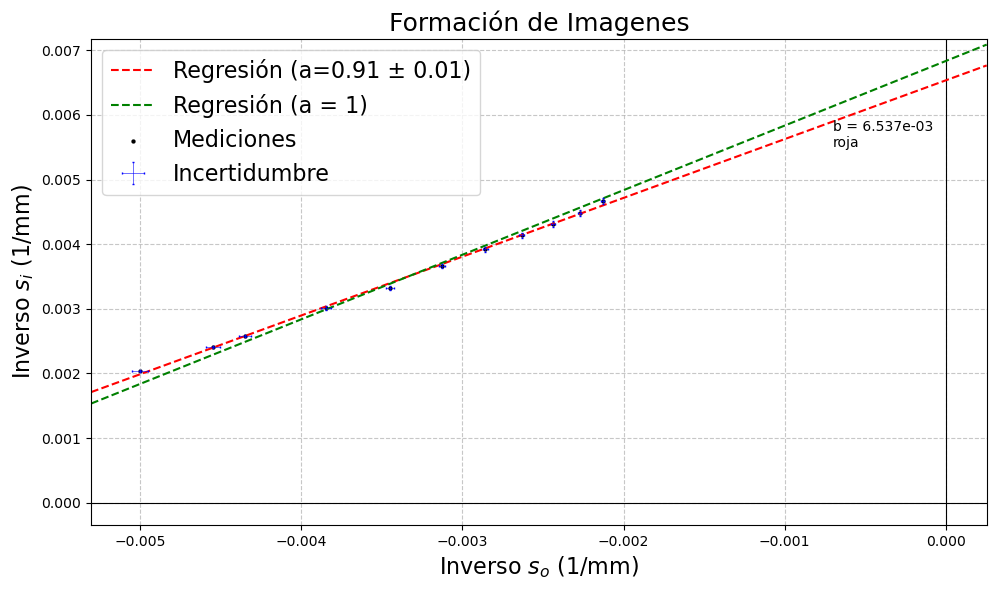

In [ ]:
# inversos
y_vals = 1 / si_mean
u_y_vals = si_uncertain / si_mean**2
x_vals = -1 / so
u_x_vals = nominal_s / so**2

# Plottting
fig, ax = plot_template(
    title="Formación de Imagenes",
    x_label="Inverso $s_o$ (1/mm)",
    y_label="Inverso $s_i$ (1/mm)",
    # x_lim=[0.002, 0.005]
)
# Graficar ejes
ax.axhline(y=0, color="black", linestyle="-", linewidth=0.8)
ax.axvline(x=0, color="black", linestyle="-", linewidth=0.8)

# Regresión típica
# Calculo
r = stats.linregress(x_vals, y_vals)
slope, intercept, slope_err, intercept_err = (
    r.slope,
    r.intercept,
    r.stderr,
    r.intercept_stderr,
)
# Recta
plt.axline(
    # xy1=(
    #     x_vals[0],
    #     x_vals[0] * slope + intercept,
    # ),  # para que no toque regular los límites
    xy1=(0, intercept),  # para que no toque regular los límites
    slope=slope,
    color="r",
    linestyle="--",
    label=f"Regresión (a={slope:.2f} ± {slope_err:.2f})",
)


# Regresion con pendiente m=1
# Define la función
def recta_con_pendiente_1(x, b):
    return x + b
    # Define los parámetros


parametros, covarianza = curve_fit(recta_con_pendiente_1, x_vals, y_vals)
b, u_b = parametros[0], np.sqrt(np.diag(covarianza))[0]
# Recta
plt.axline(
    # xy1=(
    #     x_vals[0],
    #     x_vals[0] * slope + intercept,
    # ),  # para que no toque regular los límites
    xy1=(0, b),
    slope=1,
    color="green",
    linestyle="--",
    label=f"Regresión (a = 1)",
)

# Incertidumbres
ax.errorbar(
    x_vals,
    y_vals,
    xerr=u_x_vals,
    yerr=u_y_vals,
    linestyle="none",
    color="blue",
    capsize=1,
    capthick=1,
    lw=0.4,
    label="Incertidumbre",
)
# Datos puntuales
ax.scatter(x_vals, y_vals, marker=".", lw=0.1, color="black", label="Mediciones")


# Guardar focos
f = 1 / intercept
u_f = intercept_err / intercept**2
f_m = 1 / b
u_f_m = u_b / b**2

# Impresion
print(
    f"""
Pendiente {slope:.2f} ± {slope_err:.2f}
Correlación {r.rvalue**2:.3f}
foco f= ({1 / intercept:.1f} +- {intercept_err / intercept**2:.1f}) mm
foco f_m= ({1 / b:.1f} +- {u_b / b**2:.1f}) mm
"""
)

# texto en gráfica
ax.text(-0.0007, 0.0055, f"b = {intercept:.3e}\nroja")

# ultima config
# Añadir líneas en los ejes principales
ax.legend(fontsize=16)
plt.show()

En la _recta verde_ se observa la regresión asumiendo la pendiente $a = 1$ fijada, de ahí extraeremos si el foco primario resultante $f'$ (`f_m`) a través de asumir esta condición tiene un mejor comportamiento, se obtuvo el intercepto $b_m = 0.0068(3) \, [\text{mm}^{-1}]$.

En la _recta roja_, se genera la regresión con dos grados de libertad, obteniendo valores correspondientes al foco primario $f$ con la pendiente $a = 0.91(1)$ y el intercepto $b_m = 0.0065(5) \, [\text{mm}^{-1}]$ con mayor dispersión.

En el cálculo del foco, se obtiene a partir de los inversos de los interceptos como dicta la ecuación de _Gauss_, de aquí podemos asegurar que el foco principal calculado según estas 2 propuestas son:

$$ f= (153.0 \pm 1.1)\, [\text{mm}] \qquad f_m= (146.3 \pm 0.6)\, [\text{mm}] $$

También es de notar como la gráfica de dispersión permite dilucidar alguna forma de curva pues en la mitad de la regresión los datos están por debajo de esta y en los otros casos, por encima. Puede ser este un efecto de la aproximación paraxial que ha de tenerse en cuenta para mediciones más precisas, puesto que ya con este efecto _se pierde el solape de la incertidumbre con el ajuste_.


#### Visualización de Datos (so vs hi) m


# Parte 3

# Magnificacion m

so = 50
si = 120

OM = [(696,697,695,698)]

# magnificacion 1/m

Om = [(983,987,986, 983)]


# Parte final

O = 98

si = [1143, 1148, 1146, 1148,1144, 1142,1142, 1145,1146,1144s]


## Conclusiones


#### 1. Para las 10 medidas, ¿en qué posición de la pantalla-imagen se tiene mayor incertidumbre?

Comparando las incertidumbres abolutas después del proceso de propagación, obtenemos la descripción de una variación de 2.0 mm a 3.0 mm, sin una aparente relación a lo largo de la distancia $s_i$ donde se enfoca (vease fig. inferior). Al momento de las mediciones, retardabamos más la medida dada la incertidumbre a mayores distancias, pues no se percibia enormemente la nitidez si habián fuentes de luz y principalmente que el ángulo a mayores distancias tenía una variación menorm por lo que la imagen proyectada tenía mayor rango para volverse nítida.

Aparentemente, fueron otras variables de error como la prisa que dieron a las medidas más certeras un mayor grado de incertidumbre y no haber tomado suficientes medidas en lo lejano, pero ya no era perceptible, dadas las condiciones, de hacer una medida apropiada, por lo que el sesgo pueda darse en ese sentido.


Izquierda = 2.3032825045458067 derecha = 2.6495790142780073


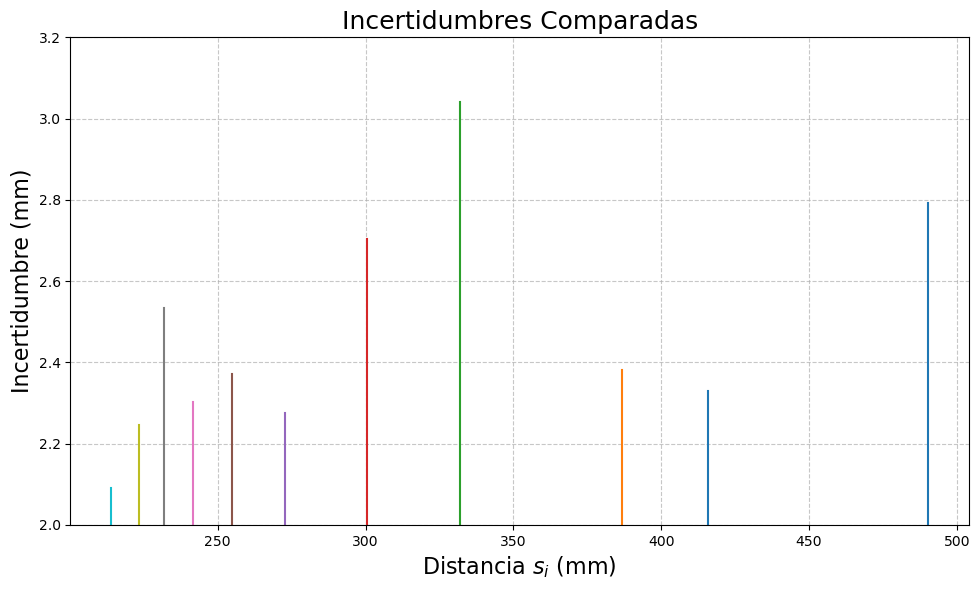

In [35]:
fig, ax = plot_template(
    title="Incertidumbres Comparadas",
    x_label="Distancia $s_i$ (mm)",
    y_label="Incertidumbre (mm)",
    y_lim=[2.0, 3.2],
)
x = df["Promedio si (mm)"]
y = df["Incertidumbre si (mm)"]
# ax.plot(x, y, "+")
for i in range(len(x)):
    ax.plot([x[i], x[i]], [0, y[i]], "-")

x_izquierda = np.mean(y[5:])
x_derecha = np.mean(y[:5])
print(f"Izquierda = {x_izquierda} derecha = {x_derecha}")

plt.show()

#### 2. Realice una gráfica $s_i$ vs $s_o$ y dibuje la curva de ajuste. Señale el punto donde la imagen tiene el mismo tamaño que el objeto.


Se verificaron 3 curvas de ajuste


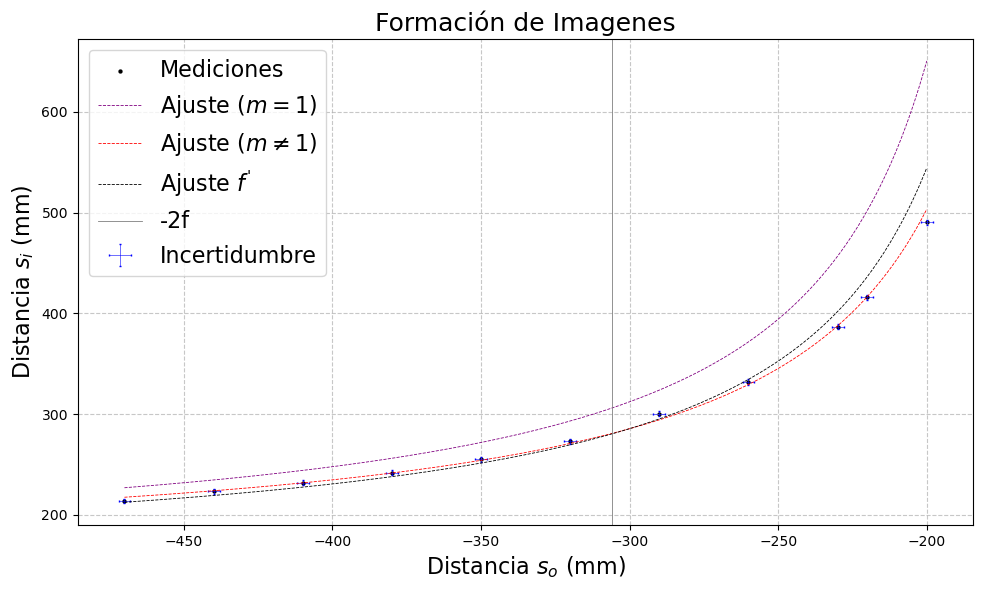

In [93]:
# inversos
y_vals = si_mean
u_y_vals = si_uncertain
x_vals = -so
u_x_vals = nominal_s

# Plottting
fig, ax = plot_template(
    title="Formación de Imagenes",
    x_label="Distancia $s_o$ (mm)",
    y_label="Distancia $s_i$ (mm)",
    # x_lim=[0.002, 0.005]
)
# errores
ax.errorbar(
    x_vals,
    y_vals,
    xerr=u_x_vals,
    yerr=u_y_vals,
    linestyle="none",
    color="blue",
    capsize=1,
    capthick=1,
    lw=0.4,
    label="Incertidumbre",
)
# datos
ax.scatter(x_vals, y_vals, marker=".", lw=0.1, color="black", label="Mediciones")


# resultante
def ajuste(var_so):
    return (var_so * f) / (var_so + f)


def ajuste_m(var_so):
    return (var_so * f) / (var_so + slope * f)


# forzada a ser a = 1
def ajuste_mf(var_so):
    return (var_so * f_m) / (var_so + f_m)


x = np.linspace(min(x_vals), max(x_vals), 400)
ax.plot(x, ajuste(x), label="Ajuste ($m = 1$)", color="purple", ls="--", lw=0.6)
ax.plot(x, ajuste_m(x), label="Ajuste ($m \\ne 1$)", color="red", ls="--", lw=0.6)
ax.plot(x, ajuste_mf(x), label="Ajuste $f^'$", color="black", ls="--", lw=0.6)
ax.axvline(-2 * f, label="-2f", lw=0.6, color="gray", ls="-")


ax.legend(fontsize=16)
plt.show()

#### 3. Realice una gráfica $ \frac{1}{s_i} $ vs $ \frac{1}{s_o} $ y dibuje la recta de ajuste. ¿Cuál es el valor de la distancia focal y su error?

Está explicado y deducido en este [apartado](####visualizacion_de_datos).


## Referencias

Mejía Barbosa, Y. (2020). Fundamentos de óptica : Curso introductorio. Universidad Nacional de Colombia. Facultad de Ciencias.
